# Analysis of Collision in New York City

<b>Group Members:</b>

Aakash Shetty

Amit Phadke

Pratik Patil

Saket Tulsan

Vatsal Gandhi

Car accidents happen in New york City at an alarming rate. Thousands of people suffer personal injuries everyday. According to the New York City Police Department, there were 228,047 car accidents in 2018 citywide. That breaks down to:

19,000 Car Accidents per month 
4,750 Car Accidents per week 
678 Car Accidents per day 
28 Car Accidents per hour 
1 Car Accident every 2 minute

The question that arise from this are: What location of new york city has most number of accidents occured? What were the causes? Did most of the accidents occur on rush hour or in midnight hours?

In the analysis given below we try to analyze the different factors that affect these accidents.

Below you will find the implementation of a few processes we have done for analysis. You can jump to the sections:

[1. Data Cleaning](#dc)<br>
[2. Exploratory Data Cleaning](#eda)<br> 
[3. Statistics and Machine Learning](#sml)<br>

## Problem Statement

Analyse the factors that affect collisions and accidents in New York City. 

#### Parameters

> Location of the accident

> Date and Time of the accident

> Number of people killed and/or injured

> Number of collisions

> Accident Information(Causes for Accidents and Vehicle Information)

### Data Setup

First we will import the library such as numpy, scipy and matplotlib to manipulate, analyze and visualize our data. The second task for setting up our data set is by importing our dataset from a csv to our notebook. Here the csv file is converted into a set of data frames

In [1]:
#importing libraries
import os
import numpy as np                #importing numpy array as np
import pandas as pd               #importing pandas library as pd
import scipy as sc                #importing scipy as sc
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt   #importing matplotlib as plt
import plotly.graph_objs as go
import seaborn as sns
import statsmodels.api as sm

sns.set(style='ticks', context='talk')

C:\Users\akash\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [2]:
pd.options.display.max_rows = 20
pd.options.display.max_columns=55

In [3]:
#Read CSV (comma-separated) is a function which reads data from csv file returns list of DataFrames
table = pd.read_csv("nypd-motor-vehicle-collisions.csv")

C:\Users\akash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
table.head()

DATE   TIME BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  2019-10-12T00:00:00.000  14:45  QUEENS    11436  40.667786  -73.79968   
1  2019-10-12T00:00:00.000  19:10     NaN      NaN  40.732162  -73.99431   
2  2019-10-11T00:00:00.000  12:45     NaN      NaN        NaN        NaN   
3  2019-10-11T00:00:00.000  15:36     NaN      NaN        NaN        NaN   
4  2019-10-11T00:00:00.000  16:41     NaN      NaN  40.726814  -73.83846   

                                            LOCATION  \
0  {'coordinates': [-73.79968, 40.667786], 'type'...   
1  {'coordinates': [-73.99431, 40.732162], 'type'...   
2                                                NaN   
3                                                NaN   
4  {'coordinates': [-73.83846, 40.726814], 'type'...   

                     ON STREET NAME CROSS STREET NAME  \
0                               NaN               NaN   
1  EAST 9 STREET                                  NaN   
2  BRONX RIVER PARKWAY RAMP                       NaN   
3  School street                       Oakdale street   
4  GRAND CENTRAL PKWY                             NaN   

                            OFF STREET NAME  NUMBER OF PERSONS INJURED  \
0  138-10    135 AVENUE                                            0.0   
1                                       NaN                        0.0   
2                                       NaN                        1.0   
3                                       NaN                        0.0   
4                                       NaN                        0.0   

   NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
0                       0.0                              0   
1                       0.0                              0   
2                       0.0                              0   
3                       0.0                              0   
4                       0.0                              0   

   NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   NUMBER OF MOTORIST KILLED CONTRIBUTING FACTOR VEHICLE 1  \
0                          0              Backing Unsafely   
1                          0            Turning Improperly   
2                          0                   Unspecified   
3                          0                   Unspecified   
4                          0         Following Too Closely   

  CONTRIBUTING FACTOR VEHICLE 2 CONTRIBUTING FACTOR VEHICLE 3  \
0                   Unspecified                           NaN   
1                   Unspecified                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                   Unspecified                           NaN   

  CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                           NaN                           NaN       4222455   
1                           NaN                           NaN       4222160   
2                           NaN                           NaN       4222892   
3                           NaN                           NaN       4221708   
4                           NaN                           NaN       4221716   

                   VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2  \
0                                 Taxi

In [1]:
table.dtypes

NameError: name 'table' is not defined

# Data Cleaning <a id="dc"></a>

The first step we will do here is cleaning our data. Here we will do operations such as getting our data into a standard format, handling null values, removing unneccesary columns or values etc.

In [5]:
#counting null values
table.isna().sum()

DATE                         0
TIME                         0
BOROUGH                 481408
ZIP CODE                481601
LATITUDE                197343
                        ...   
VEHICLE TYPE CODE 1       5417
VEHICLE TYPE CODE 2     260951
VEHICLE TYPE CODE 3    1464994
VEHICLE TYPE CODE 4    1546937
VEHICLE TYPE CODE 5    1577289
Length: 29, dtype: int64

In [6]:
#getting date and time into a standard format of 'yyyy-mm-dd' and 'hh:mm' respectively. 
dateparse = lambda x : pd.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f')
table = pd.read_csv("nypd-motor-vehicle-collisions.csv" , parse_dates = ['DATE'] , date_parser = dateparse)

#we will drop street information and location information since we alredy have columns for borough,latitude and longitude
table.drop(table.columns[6:10],axis=1,inplace=True)

In [7]:
#Since the focus of our analysis is not vehicle types we will be ommiting the vehicle records 
table.drop(table.columns[20:25],axis=1,inplace=True)

In [8]:
table.drop(table.columns[8:14],axis=1,inplace=True)

In [9]:
table.head()

DATE   TIME BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0 2019-10-12  14:45  QUEENS    11436  40.667786  -73.79968   
1 2019-10-12  19:10     NaN      NaN  40.732162  -73.99431   
2 2019-10-11  12:45     NaN      NaN        NaN        NaN   
3 2019-10-11  15:36     NaN      NaN        NaN        NaN   
4 2019-10-11  16:41     NaN      NaN  40.726814  -73.83846   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        1.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
0              Backing Unsafely                   Unspecified   
1            Turning Improperly                   Unspecified   
2                   Unspecified                           NaN   
3                   Unspecified                           NaN   
4         Following Too Closely                   Unspecified   

  CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  
0                           NaN       4222455  
1                           NaN       4222160  
2                           NaN       4222892  
3                           NaN       4221708  
4                           NaN       4221716

In [10]:
#Here we will replace the blank spaces in the column heading with and underscore as is the standard format.
cols = table.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
table.columns = cols
table.head()

DATE   TIME BOROUGH ZIP_CODE   LATITUDE  LONGITUDE  \
0 2019-10-12  14:45  QUEENS    11436  40.667786  -73.79968   
1 2019-10-12  19:10     NaN      NaN  40.732162  -73.99431   
2 2019-10-11  12:45     NaN      NaN        NaN        NaN   
3 2019-10-11  15:36     NaN      NaN        NaN        NaN   
4 2019-10-11  16:41     NaN      NaN  40.726814  -73.83846   

   NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        1.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING_FACTOR_VEHICLE_1 CONTRIBUTING_FACTOR_VEHICLE_2  \
0              Backing Unsafely                   Unspecified   
1            Turning Improperly                   Unspecified   
2                   Unspecified                           NaN   
3                   Unspecified                           NaN   
4         Following Too Closely                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_3 CONTRIBUTING_FACTOR_VEHICLE_4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  
0                           NaN       4222455  
1                           NaN       4222160  
2                           NaN       4222892  
3                           NaN       4221708  
4                           NaN       4221716

In [11]:
#Blank borough values will be filled with the string as 'Unspecified'
table.BOROUGH=table.BOROUGH.fillna('Unspecified')

#blank zipcodes wil be handled by the value is '0'
table.ZIP_CODE=table.ZIP_CODE.fillna('0')

#if the contributing factors of the vehicles are not known add the the value 'unspecified' on that row
table.CONTRIBUTING_FACTOR_VEHICLE_1=table.CONTRIBUTING_FACTOR_VEHICLE_1.fillna('Unspecified')
table.CONTRIBUTING_FACTOR_VEHICLE_2=table.CONTRIBUTING_FACTOR_VEHICLE_2.fillna('Unspecified')
table.CONTRIBUTING_FACTOR_VEHICLE_3=table.CONTRIBUTING_FACTOR_VEHICLE_3.fillna('Unspecified')
table.CONTRIBUTING_FACTOR_VEHICLE_4=table.CONTRIBUTING_FACTOR_VEHICLE_4.fillna('Unspecified')
table.CONTRIBUTING_FACTOR_VEHICLE_5=table.CONTRIBUTING_FACTOR_VEHICLE_5.fillna('Unspecified')

#table.VEHICLE_TYPE_CODE_1=table.VEHICLE_TYPE_CODE_1.fillna('Unspecified')
table.head()

DATE   TIME      BOROUGH ZIP_CODE   LATITUDE  LONGITUDE  \
0 2019-10-12  14:45       QUEENS    11436  40.667786  -73.79968   
1 2019-10-12  19:10  Unspecified        0  40.732162  -73.99431   
2 2019-10-11  12:45  Unspecified        0        NaN        NaN   
3 2019-10-11  15:36  Unspecified        0        NaN        NaN   
4 2019-10-11  16:41  Unspecified        0  40.726814  -73.83846   

   NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        1.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING_FACTOR_VEHICLE_1 CONTRIBUTING_FACTOR_VEHICLE_2  \
0              Backing Unsafely                   Unspecified   
1            Turning Improperly                   Unspecified   
2                   Unspecified                   Unspecified   
3                   Unspecified                   Unspecified   
4         Following Too Closely                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_3 CONTRIBUTING_FACTOR_VEHICLE_4  \
0                   Unspecified                   Unspecified   
1                   Unspecified                   Unspecified   
2                   Unspecified                   Unspecified   
3                   Unspecified                   Unspecified   
4                   Unspecified                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  
0                   Unspecified       4222455  
1                   Unspecified       4222160  
2                   Unspecified       4222892  
3                   Unspecified       4221708  
4                   Unspecified       4221716

In [12]:
#In few of the cases we are blank values for latitudes and longitudes. We will add the value '0' to the blank spaces. 
table.LATITUDE=table.LATITUDE.fillna('0')
table.LONGITUDE=table.LONGITUDE.fillna('0')
table.head()

DATE   TIME      BOROUGH ZIP_CODE LATITUDE LONGITUDE  \
0 2019-10-12  14:45       QUEENS    11436  40.6678  -73.7997   
1 2019-10-12  19:10  Unspecified        0  40.7322  -73.9943   
2 2019-10-11  12:45  Unspecified        0        0         0   
3 2019-10-11  15:36  Unspecified        0        0         0   
4 2019-10-11  16:41  Unspecified        0  40.7268  -73.8385   

   NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        1.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING_FACTOR_VEHICLE_1 CONTRIBUTING_FACTOR_VEHICLE_2  \
0              Backing Unsafely                   Unspecified   
1            Turning Improperly                   Unspecified   
2                   Unspecified                   Unspecified   
3                   Unspecified                   Unspecified   
4         Following Too Closely                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_3 CONTRIBUTING_FACTOR_VEHICLE_4  \
0                   Unspecified                   Unspecified   
1                   Unspecified                   Unspecified   
2                   Unspecified                   Unspecified   
3                   Unspecified                   Unspecified   
4                   Unspecified                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  
0                   Unspecified       4222455  
1                   Unspecified       4222160  
2                   Unspecified       4222892  
3                   Unspecified       4221708  
4                   Unspecified       4221716

In [13]:
#Here we are standardizing the different contributing factors
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Illnes"],value="Illness")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Drugs (illegal)"],value="Drugs (Illegal)")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Texting","Cell Phone (hands-free)","Cell Phone (hand-held)","Cell Phone (hand-Held)","Listening/Using Headphones"],value="Cell Phone")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Reaction to Uninvolved Vehicle","Reaction to Other Uninvolved Vehicle"],value="Reaction to Uninvolved Vehicle")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Using On Board Navigation Device","Other Electronic Device"],value="Devices")
table['CONTRIBUTING_FACTOR_VEHICLE_1'] = table.CONTRIBUTING_FACTOR_VEHICLE_1.replace(to_replace=["Shoulders Defective/Improper"],value="Physical Disability")

In [14]:
#Here we are standardizing the different contributing factors
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Illnes"],value="Illness")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Drugs (illegal)"],value="Drugs (Illegal)")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Texting","Cell Phone (hands-free)","Cell Phone (hand-held)","Cell Phone (hand-Held)","Listening/Using Headphones"],value="Cell Phone")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Using On Board Navigation Device","Other Electronic Device"],value="Devices")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Shoulders Defective/Improper"],value="Physical Disability")
table['CONTRIBUTING_FACTOR_VEHICLE_2'] = table.CONTRIBUTING_FACTOR_VEHICLE_2.replace(to_replace=["Reaction to Uninvolved Vehicle","Reaction to Other Uninvolved Vehicle","Other Vehicular"],value="Reaction to Uninvolved Vehicle")

In [15]:
#Here we are standardizing the different contributing factors
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Illnes"],value="Illness")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Drugs (illegal)"],value="Drugs (Illegal)")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Texting","Cell Phone (hands-free)","Cell Phone (hand-held)","Cell Phone (hand-Held)","Listening/Using Headphones"],value="Cell Phone")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Using On Board Navigation Device","Other Electronic Device"],value="Devices")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Shoulders Defective/Improper"],value="Physical Disability")
table['CONTRIBUTING_FACTOR_VEHICLE_3'] = table.CONTRIBUTING_FACTOR_VEHICLE_3.replace(to_replace=["Reaction to Uninvolved Vehicle","Reaction to Other Uninvolved Vehicle","Other Vehicular"],value="Reaction to Uninvolved Vehicle")

In [16]:
#Here we are standardizing the different contributing factors
table['CONTRIBUTING_FACTOR_VEHICLE_4'] = table.CONTRIBUTING_FACTOR_VEHICLE_4.replace(to_replace=["Illnes"],value="Illness")
table['CONTRIBUTING_FACTOR_VEHICLE_4'] = table.CONTRIBUTING_FACTOR_VEHICLE_4.replace(to_replace=["Drugs (illegal)"],value="Drugs (Illegal)")

In [17]:
table.head()

DATE   TIME      BOROUGH ZIP_CODE LATITUDE LONGITUDE  \
0 2019-10-12  14:45       QUEENS    11436  40.6678  -73.7997   
1 2019-10-12  19:10  Unspecified        0  40.7322  -73.9943   
2 2019-10-11  12:45  Unspecified        0        0         0   
3 2019-10-11  15:36  Unspecified        0        0         0   
4 2019-10-11  16:41  Unspecified        0  40.7268  -73.8385   

   NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        1.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING_FACTOR_VEHICLE_1 CONTRIBUTING_FACTOR_VEHICLE_2  \
0              Backing Unsafely                   Unspecified   
1            Turning Improperly                   Unspecified   
2                   Unspecified                   Unspecified   
3                   Unspecified                   Unspecified   
4         Following Too Closely                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_3 CONTRIBUTING_FACTOR_VEHICLE_4  \
0                   Unspecified                   Unspecified   
1                   Unspecified                   Unspecified   
2                   Unspecified                   Unspecified   
3                   Unspecified                   Unspecified   
4                   Unspecified                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  
0                   Unspecified       4222455  
1                   Unspecified       4222160  
2                   Unspecified       4222892  
3                   Unspecified       4221708  
4                   Unspecified       4221716

In [18]:
table['Hour'] = pd.to_datetime(table['TIME']).dt.hour
table.head()

DATE   TIME      BOROUGH ZIP_CODE LATITUDE LONGITUDE  \
0 2019-10-12  14:45       QUEENS    11436  40.6678  -73.7997   
1 2019-10-12  19:10  Unspecified        0  40.7322  -73.9943   
2 2019-10-11  12:45  Unspecified        0        0         0   
3 2019-10-11  15:36  Unspecified        0        0         0   
4 2019-10-11  16:41  Unspecified        0  40.7268  -73.8385   

   NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        1.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING_FACTOR_VEHICLE_1 CONTRIBUTING_FACTOR_VEHICLE_2  \
0              Backing Unsafely                   Unspecified   
1            Turning Improperly                   Unspecified   
2                   Unspecified                   Unspecified   
3                   Unspecified                   Unspecified   
4         Following Too Closely                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_3 CONTRIBUTING_FACTOR_VEHICLE_4  \
0                   Unspecified                   Unspecified   
1                   Unspecified                   Unspecified   
2                   Unspecified                   Unspecified   
3                   Unspecified                   Unspecified   
4                   Unspecified                   Unspecified   

  CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  Hour  
0                   Unspecified       4222455    14  
1                   Unspecified       4222160    19  
2                   Unspecified       4222892    12  
3                   Unspecified       4221708    15  
4                   Unspecified       4221716    16

# Exploratory Data Analysis<a id="eda"></a>

Exporatory Data analysis or EDA is an approach to analyzing your dataset to summarize their characteristics often with visual methods. For the above given dataset we have explored the attributes using appropriate graphical model. This will help us to understand the nature of our data, its behavoir and so on. In the below sections we will analyze our data that with try to answers quesion like why, where and when do these collisions occurs and how many people are affected. 

We have divided our EDA in three different parts<br>
[Analysis of Collisions based on Contributing Factor](#cf)<br>
[Analysis of collisions based on boroughs](#bor)<br>
[Analysis of collsions based on different Time periods](#time)<br>

### Analysis of Collisions based on Contributing Factor<a id="cf"></a>

Another important part of the analysis is exploring why these collision occur. The columns of contrbuting factors give the wide variety of reasons that result into the unfortunate events. In our analysis there was a wide spectrum of causal factors. Some of them being more frequent. Below graph represents the top 10 factors that cause collision in New York City.

In [19]:
Contributing_factor1= table['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()
Contributing_factor2= table['CONTRIBUTING_FACTOR_VEHICLE_2'].value_counts()
Contributing_factor3= table['CONTRIBUTING_FACTOR_VEHICLE_3'].value_counts()
Contributing_factor4= table['CONTRIBUTING_FACTOR_VEHICLE_4'].value_counts()
Contributing_factor5= table['CONTRIBUTING_FACTOR_VEHICLE_5'].value_counts()

Contributing_factor = Contributing_factor1+Contributing_factor2+Contributing_factor3+Contributing_factor4+Contributing_factor5
Contributing_factor = Contributing_factor.sort_values(ascending=False).dropna()
Contributing_factor=Contributing_factor.drop(['Unspecified'])
congif = Contributing_factor.head(10)

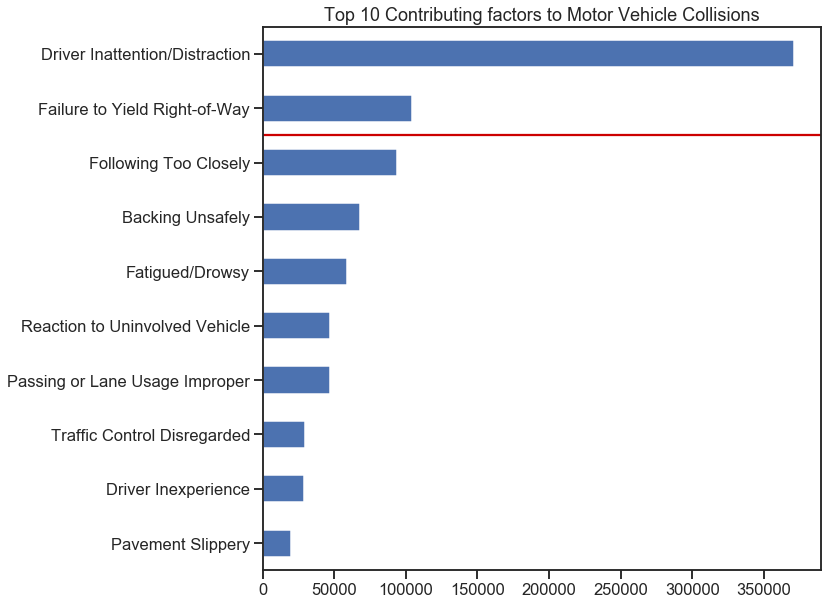

In [20]:
#Plotting a Bar diagram to explore how causal factors are represented in the data set 
congif.plot(kind='barh',title='Top 10 Contributing factors to Motor Vehicle Collisions', figsize=(10,10)).invert_yaxis()
plt.axhline(len(Contributing_factor)-18.5, color='#CC0000')

> From the above graph we can see that maximum amount of collision occur due to driver negligence, distraction or inattentions. 

### Analysis of collisions based on borough <a id="bor"></a>

New York City is divided into 5 boroughs. We wanted to see how many collision occur in every buroughs of NYC and how many people are either injured or killed in these collisions

In [21]:
table_borough = table.groupby(table.BOROUGH).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']].join(table.groupby(table.BOROUGH).count()['COLLISION_ID'])
table_borough=table_borough.drop(['Unspecified'])
table_borough

NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
BOROUGH                                                              
BRONX                            43939.0                     168.0   
BROOKLYN                         99289.0                     387.0   
MANHATTAN                        45884.0                     223.0   
QUEENS                           76753.0                     361.0   
STATEN ISLAND                    11699.0                      62.0   

               COLLISION_ID  
BOROUGH                      
BRONX                154038  
BROOKLYN             343301  
MANHATTAN            265322  
QUEENS               294328  
STATEN ISLAND         47918

Text(0, 0.5, 'Boroughs')

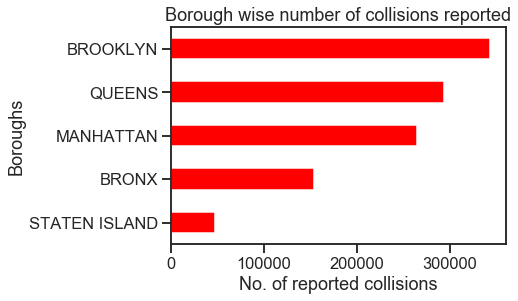

In [22]:
#BOROUGH wise classification of number of collisions
table2=table['BOROUGH'].value_counts()
table2=table2.drop(['Unspecified'])
table2.plot.barh(title='Borough wise number of collisions reported', color="red").invert_yaxis()
#table2.plot.barh(title='Borough wise number of collisions reported', color="red")
plt.xlabel('No. of reported collisions', fontsize=18)
plt.ylabel('Boroughs', fontsize=18)

Text(0, 0.5, 'Count of people injured')

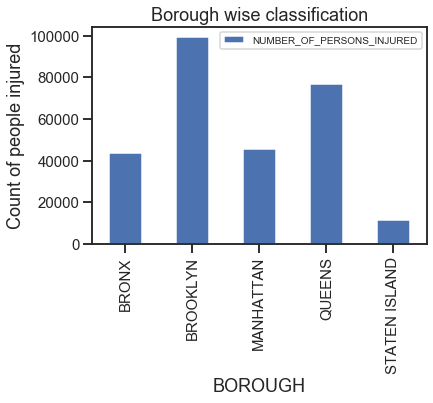

In [23]:
table_borough['NUMBER_OF_PERSONS_INJURED'].plot(kind='bar', title='Borough wise classification', fontsize=15)
plt.legend(loc="upper right", prop={'size': 10})
plt.ylabel('Count of people injured', fontsize=18)

Text(0, 0.5, 'Count of people killed')

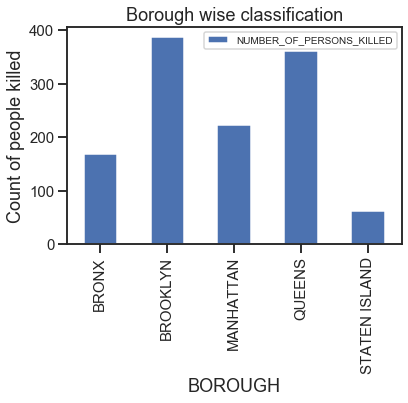

In [24]:
table_borough['NUMBER_OF_PERSONS_KILLED'].plot(kind='bar', 
                                               title='Borough wise classification', fontsize=15)
plt.legend(loc="upper right", prop={'size': 10})
plt.ylabel('Count of people killed', fontsize=18)

> Here, we can see that Brooklyn has the most number of people getting killed and injured while Staten Island has the least. Also The highest number of Reported Collisions occur in brooklyn followed by Queens and Manahattan with Staten Island with least number of reported collisons. 

### Analysis of collsions based on different Time periods <a id="time"></a>

In the section below we will explore our data based on day, month, time etc. We will also how these changes in time periods affect our collision rate and the no. of persons killed or injured. 

#### Analysis of collsions based on month of the year
First we will analyze the number of people killed or injured based on all the months in a year.  

In [25]:
table['YEAR_DATE'] = pd.to_datetime(table['DATE'])
table['YEAR']= (table['YEAR_DATE']).dt.year

In [26]:
#code for creating a table that shows number of people killed each month. 
table['Months'] = pd.to_datetime(table['DATE'])
table_month=table.groupby(table.Months.dt.month).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']].join(table.groupby(table.Months.dt.month).count()['COLLISION_ID'])
table_month=table_month.reset_index()

In [27]:
table_month=table_month.rename({0: 'Jan', 1: 'Feb',2: 'Mar', 3: 'Apr',4: 'May', 5: 'Jun',6: 'Jul', 7: 'Aug',8: 'Sep', 9: 'Oct',10: 'Nov', 11: 'Dec'})
table_month=table_month.drop(['Months'],axis=1)

In [28]:
table_month

NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  COLLISION_ID
Jan                    26276.0                     150.0        108140
Feb                    29299.0                     128.0        124926
Mar                    33798.0                     136.0        139746
Apr                    26152.0                     125.0        101961
May                    34063.0                     135.0        129136
Jun                    38630.0                     177.0        142388
Jul                    38869.0                     162.0        137887
Aug                    43292.0                     201.0        154674
Sep                    40490.0                     190.0        144866
Oct                    34915.0                     159.0        131928
Nov                    36932.0                     179.0        144817
Dec                    32231.0                     142.0        125846

Text(0.5, 0, 'Month')

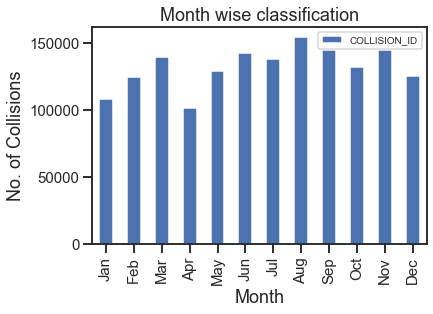

In [29]:
#plotting the table
table_month['COLLISION_ID'].plot.bar(title='Month wise classification', fontsize = 15)
plt.legend(loc="best", prop={'size': 10})
plt.ylabel('No. of Collisions', fontsize=18)
plt.xlabel('Month', fontsize=18)

Text(0.5, 0, 'Month')

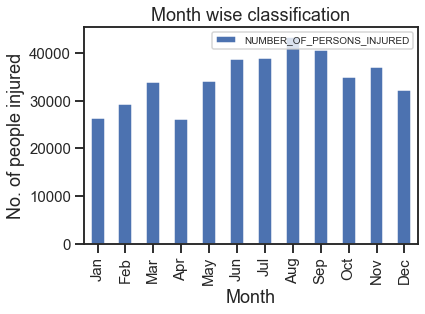

In [30]:
#plotting the table
table_month['NUMBER_OF_PERSONS_INJURED'].plot.bar(title='Month wise classification', fontsize = 15)
plt.legend(loc="best", prop={'size': 10})
plt.ylabel('No. of people injured', fontsize=18)
plt.xlabel('Month', fontsize=18)

Text(0.5, 0, 'Month')

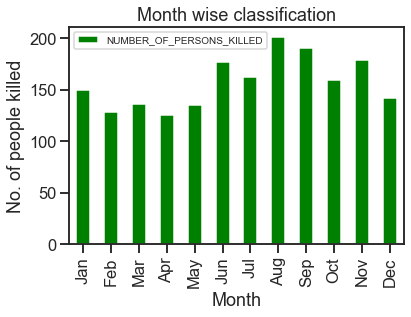

In [31]:
table_month['NUMBER_OF_PERSONS_KILLED'].plot.bar(title='Month wise classification',color="green")
plt.legend(loc="best", prop={'size': 10})
plt.ylabel('No. of people killed', fontsize=18)
plt.xlabel('Month', fontsize=18)

> From the above charts we can see that the month of August is the most dangerous given its collision, injury and death rates.

#### Analysis based on day of the week

After a per month analysis a good idea would be to analyze different day in a week. This will allow us to understand the nature of collisions on weekends and weekdays  

In [32]:
table['WEEKDAY'] = pd.to_datetime(table['DATE'])
table_weekday=table.groupby(table.WEEKDAY.dt.weekday_name).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']].join(table.groupby(table.WEEKDAY.dt.weekday_name).count()['COLLISION_ID'])
table_weekday

NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  COLLISION_ID
WEEKDAY                                                                     
Friday                       63855.0                     279.0        254451
Monday                       57838.0                     315.0        227225
Saturday                     59496.0                     276.0        209750
Sunday                       56736.0                     294.0        186717
Thursday                     59326.0                     236.0        238555
Tuesday                      59193.0                     256.0        235238
Wednesday                    58503.0                     228.0        234379

Text(0.5, 0, 'Days')

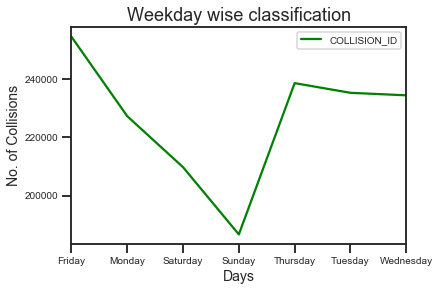

In [33]:
#table_weekday['NUMBER_OF_PERSONS_INJURED'].plot(kind='bar', title='Weekday wise classification', fontsize=15, color = 'green')
table_weekday['COLLISION_ID'].plot(title='Weekday wise classification', fontsize=10, color = 'green')
plt.legend(loc="upper right", prop={'size': 10})
plt.ylabel('No. of Collisions', fontsize=14)
plt.xlabel('Days', fontsize=14)

Text(0.5, 0, 'Days')

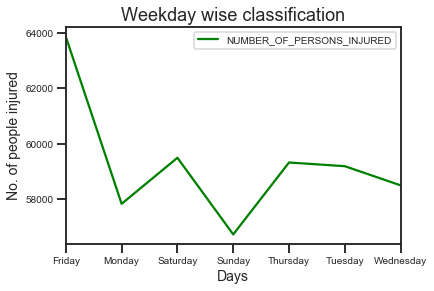

In [34]:
#table_weekday['NUMBER_OF_PERSONS_INJURED'].plot(kind='bar', title='Weekday wise classification', fontsize=15, color = 'green')
table_weekday['NUMBER_OF_PERSONS_INJURED'].plot(title='Weekday wise classification', fontsize=10, color = 'green')
plt.legend(loc="upper right", prop={'size': 10})
plt.ylabel('No. of people injured', fontsize=14)
plt.xlabel('Days', fontsize=14)

Text(0.5, 0, 'Days')

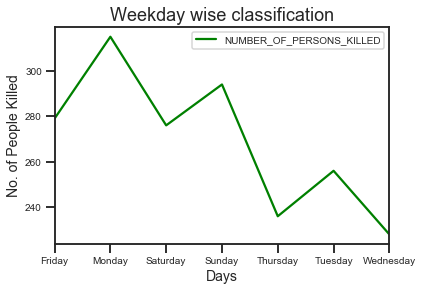

In [35]:
#table_weekday['NUMBER_OF_PERSONS_INJURED'].plot(kind='bar', title='Weekday wise classification', fontsize=15, color = 'green')
table_weekday['NUMBER_OF_PERSONS_KILLED'].plot(title='Weekday wise classification', fontsize=10, color = 'green')
plt.legend(loc="upper right", prop={'size': 10})
plt.ylabel('No. of People Killed', fontsize=14)
plt.xlabel('Days', fontsize=14)

> As shown by he above graphs we can see that most accidents happen on Fridays. 

## Analysis of Collisions based on hour of the day

Knowing when these collision exactly happen can gives us great insights into accident analysis

In [36]:
table['HOUR'] = pd.to_datetime(table['TIME'])
table_hour=table.groupby(table.HOUR.dt.hour).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']].join(table.groupby(table.HOUR.dt.hour).count()['COLLISION_ID'])
table_hour

NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  COLLISION_ID
HOUR                                                                   
0                       13915.0                      77.0         45819
1                        8105.0                      67.0         24685
2                        6402.0                      61.0         18761
3                        5917.0                      83.0         16304
4                        6997.0                     112.0         18935
...                         ...                       ...           ...
19                      23211.0                      85.0         80861
20                      21041.0                      80.0         66839
21                      18207.0                     102.0         55809
22                      16932.0                      87.0         50144
23                      14168.0                     111.0         40800

[24 rows x 3 columns]

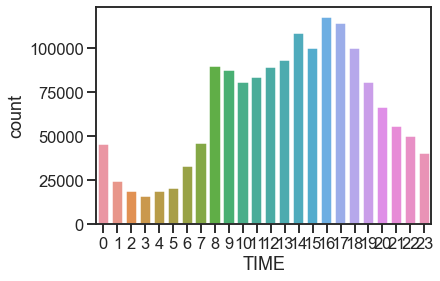

In [37]:
#Hour wise classification of number of collisions
table['TIME'] = pd.to_datetime(table['TIME'])
ax = sns.countplot(x=table.TIME.dt.hour, data=table)

Text(0, 0.5, 'No. of people injured')

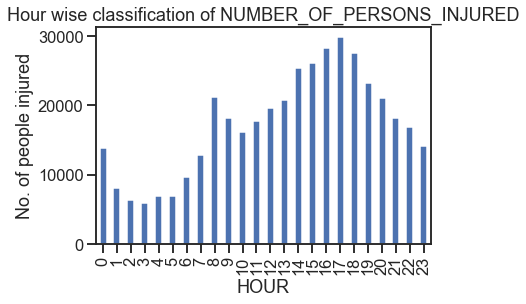

In [38]:
table_hour['NUMBER_OF_PERSONS_INJURED'].plot.bar(title='Hour wise classification of NUMBER_OF_PERSONS_INJURED')
plt.ylabel('No. of people injured', fontsize=18)

Text(0, 0.5, 'No. of people Killed')

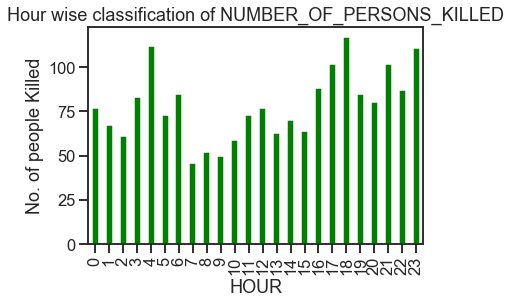

In [39]:
table_hour['NUMBER_OF_PERSONS_KILLED'].plot.bar(title='Hour wise classification of NUMBER_OF_PERSONS_KILLED',color="green")
plt.ylabel('No. of people Killed', fontsize=18)

> Here we can see that most of the collision, injuries or deaths occur between 16:00 hours to 18:00 hours. Same is the case with morning ours of 8:00 am. This can be explained due peak rush hour trafic during these time. A small irregularity in the data can be scene in the third graph where no of people killed is high at 4 pm. 

### Plot hour by day of the week

In all of the above charts we did univariate analysis that is on a single variable. Below we explore our data based on multivariate analysis. Here we will track injuries, deaths and collisions happening every hour and every day 

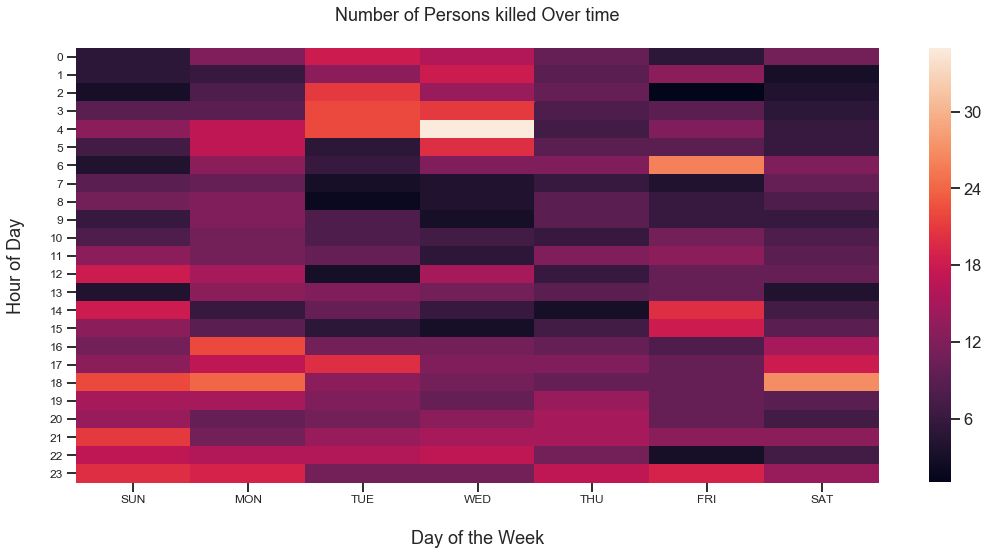

In [40]:
plt.figure(figsize=(18, 8))
table['WEEKDAY'] = pd.to_datetime(table['DATE'])
table['HOUR'] = pd.to_datetime(table['TIME'])
dayofweek = table.groupby([table.WEEKDAY.dt.weekday_name, table.HOUR.dt.hour])['NUMBER_OF_PERSONS_KILLED'].sum().unstack().T
sns.heatmap(dayofweek)
plt.xticks(np.arange(7) + .5, ('SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'))
#plt.yticks(rotation=0)
plt.ylabel('Hour of Day\n', size=18)
plt.xlabel('\nDay of the Week', size=18)
plt.yticks(rotation=0, size=12)
plt.xticks(rotation=0, size=12)
plt.title("Number of Persons killed Over time\n", size=18, );

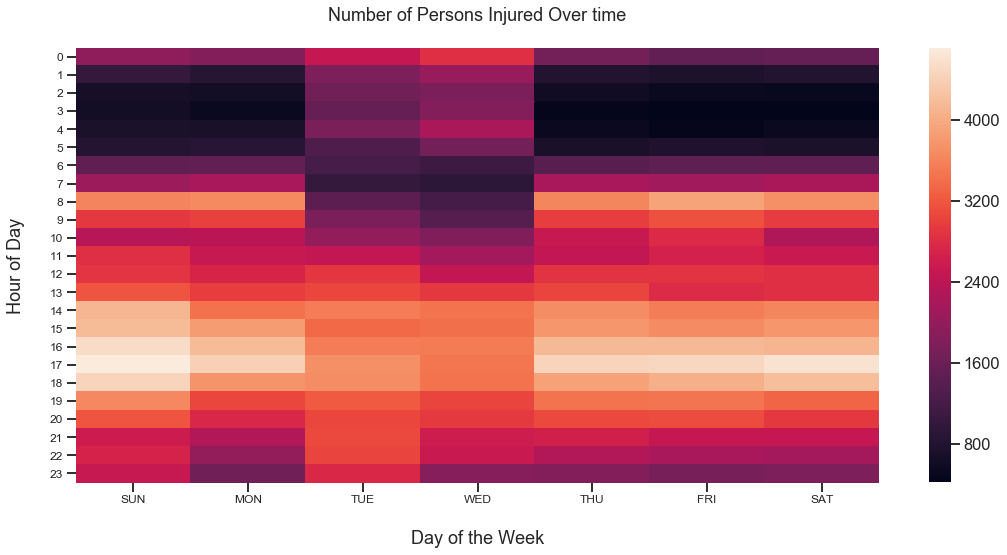

In [41]:
plt.figure(figsize=(18, 8))
table['WEEKDAY'] = pd.to_datetime(table['DATE'])
table['HOUR'] = pd.to_datetime(table['TIME'])
dayofweek = table.groupby([table.WEEKDAY.dt.weekday_name, table.HOUR.dt.hour])['NUMBER_OF_PERSONS_INJURED'].sum().unstack().T
sns.heatmap(dayofweek)
plt.xticks(np.arange(7) + .5, ('SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'))
#plt.yticks(rotation=0)
plt.ylabel('Hour of Day\n', size=18)
plt.xlabel('\nDay of the Week', size=18)
plt.yticks(rotation=0, size=12)
plt.xticks(rotation=0, size=12)
plt.title("Number of Persons Injured Over time\n", size=18, );

#### Analysis on Recent Data

In the analysis given below we have explored our most recent data that of 2018.

In [42]:
df_loc = table[['DATE','LATITUDE','LONGITUDE','NUMBER_OF_PERSONS_INJURED','BOROUGH','NUMBER_OF_PERSONS_KILLED']]

In [43]:
currentyear = 2018

df_loc = df_loc[pd.DatetimeIndex(df_loc.DATE).year == currentyear]
df_loc=df_loc[df_loc.BOROUGH != 'Unspecified']

df_loc = df_loc[df_loc.NUMBER_OF_PERSONS_INJURED > 0]

df_loc.head()

DATE LATITUDE LONGITUDE  NUMBER_OF_PERSONS_INJURED    BOROUGH  \
150089 2018-12-24        0         0                        1.0      BRONX   
150092 2018-12-24        0         0                        1.0      BRONX   
150111 2018-12-18  40.7641  -73.7879                        1.0     QUEENS   
150219 2018-11-08  40.7206  -74.0052                        1.0  MANHATTAN   
152857 2018-12-31  40.6322  -73.9389                        2.0   BROOKLYN   

        NUMBER_OF_PERSONS_KILLED  
150089                       0.0  
150092                       0.0  
150111                       0.0  
150219                       0.0  
152857                       0.0

In [44]:
#Access token from Plotly
mapbox_access_token = 'pk.eyJ1Ijoia3Jwb3BraW4iLCJhIjoiY2pzcXN1eDBuMGZrNjQ5cnp1bzViZWJidiJ9.ReBalb28P1FCTWhmYBnCtA'

#Prepare data for Plotly
data = [
    go.Scattermapbox(
        lat=df_loc.LATITUDE,
        lon=df_loc.LONGITUDE,
        mode='markers',
        text=df_loc[['BOROUGH','NUMBER_OF_PERSONS_INJURED']],
        marker=dict(
            size=7,
            color=df_loc.NUMBER_OF_PERSONS_INJURED,
            colorscale='RdBu',
            reversescale=True,
            colorbar=dict(
                title='NUMBER_OF_PERSONS_INJURED'
            )
        ),
    )
]

In [45]:
#Prepare layout for Plotly
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    title='NYPD Motor Vehicle Collisions in ' + str(currentyear),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=40.721319,
            lon=-73.987130
        ),
        pitch=0,
        zoom=11
    ),
)

In [46]:
from plotly.offline import init_notebook_mode, iplot
#Create map using Plotly
fig = dict(data=data, layout=layout)
iplot(fig, filename='NYPD Collisions')

In [47]:
df_loc1 = df_loc[df_loc.NUMBER_OF_PERSONS_KILLED > 0]

df_loc1.head()

DATE LATITUDE LONGITUDE  NUMBER_OF_PERSONS_INJURED  \
180554 2018-12-19  40.5376  -74.1588                        1.0   
183352 2018-11-15  40.7474  -73.7081                        1.0   
186805 2018-11-26  40.7156  -73.9943                        6.0   
188680 2018-12-04  40.5898  -73.9379                        1.0   
195441 2018-11-23  40.6562  -73.7674                        1.0   

              BOROUGH  NUMBER_OF_PERSONS_KILLED  
180554  STATEN ISLAND                       1.0  
183352         QUEENS                       1.0  
186805      MANHATTAN                       1.0  
188680       BROOKLYN                       1.0  
195441         QUEENS                       1.0

In [48]:
#Access token from Plotly
mapbox_access_token = 'pk.eyJ1Ijoia3Jwb3BraW4iLCJhIjoiY2pzcXN1eDBuMGZrNjQ5cnp1bzViZWJidiJ9.ReBalb28P1FCTWhmYBnCtA'

#Prepare data for Plotly
data = [
    go.Scattermapbox(
        lat=df_loc1.LATITUDE,
        lon=df_loc1.LONGITUDE,
        mode='markers',
        text=df_loc1[['BOROUGH','NUMBER_OF_PERSONS_KILLED']],
        marker=dict(
            size=7,
            color=df_loc1.NUMBER_OF_PERSONS_KILLED,
            colorscale='RdBu',
            reversescale=True,
            colorbar=dict(
                title='NUMBER_OF_PERSONS_KILLED'
            )
        ),
    )
]

In [49]:
#Prepare layout for Plotly
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    title='NYPD Motor Vehicle Collisions in ' + str(currentyear),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=40.721319,
            lon=-73.987130
        ),
        pitch=0,
        zoom=11
    ),
)

In [50]:
from plotly.offline import init_notebook_mode, iplot
#Create map using Plotly
fig = dict(data=data, layout=layout)
iplot(fig, filename='NYPD Collisions')

# REGRESSION

In [51]:
table_reg=table.replace('Unspecified'," ")
table_reg['Months_number'] = table_reg.Months.dt.month
table_reg.head()

DATE                TIME BOROUGH ZIP_CODE LATITUDE LONGITUDE  \
0 2019-10-12 2019-12-01 14:45:00  QUEENS    11436  40.6678  -73.7997   
1 2019-10-12 2019-12-01 19:10:00                0  40.7322  -73.9943   
2 2019-10-11 2019-12-01 12:45:00                0        0         0   
3 2019-10-11 2019-12-01 15:36:00                0        0         0   
4 2019-10-11 2019-12-01 16:41:00                0  40.7268  -73.8385   

   NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        1.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  CONTRIBUTING_FACTOR_VEHICLE_1 CONTRIBUTING_FACTOR_VEHICLE_2  \
0              Backing Unsafely                                 
1            Turning Improperly                                 
2                                                               
3                                                               
4         Following Too Closely                                 

  CONTRIBUTING_FACTOR_VEHICLE_3 CONTRIBUTING_FACTOR_VEHICLE_4  \
0                                                               
1                                                               
2                                                               
3                                                               
4                                                               

  CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  Hour  YEAR_DATE  YEAR  \
0                                     4222455    14 2019-10-12  2019   
1                                     4222160    19 2019-10-12  2019   
2                                     4222892    12 2019-10-11  2019   
3                                     4221708    15 2019-10-11  2019   
4                                     4221716    16 2019-10-11  2019   

      Months    WEEKDAY                HOUR  Months_number  
0 2019-10-12 2019-10-12 2019-12-01 14:45:00             10  
1 2019-10-12 2019-10-12 2019-12-01 19:10:00             10  
2 2019-10-11 2019-10-11 2019-12-01 12:45:00             10  
3 2019-10-11 2019-10-11 2019-12-01 15:36:00             10  
4 2019-10-11 2019-10-11 2019-12-01 16:41:00             10

In [52]:
# create a fitted model with all three features
#lm = ols(formula=' NUMBER_OF_PERSONS_INJURED ~ BOROUGH + CONTRIBUTING_FACTOR_VEHICLE_1 + Hour ', data=table_reg).fit()
lm = ols(formula=' NUMBER_OF_PERSONS_INJURED ~ Hour + Months_number', data=table_reg).fit()

In [53]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     NUMBER_OF_PERSONS_INJURED   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     219.9
Date:                       Sun, 01 Dec 2019   Prob (F-statistic):           3.13e-96
Time:                               22:24:52   Log-Likelihood:            -1.5902e+06
No. Observations:                    1586299   AIC:                         3.180e+06
Df Residuals:                        1586296   BIC:                         3.180e+06
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2279      0.002    134.571      0.000       0.225       0.231
Hour              0.0014   9.34e-05     14.816      0.000       0.001       0.002
Months_number     0.0023      0.000     14.696      0.000       0.002       0.003
==============================================================================
Omnibus:                  1597324.000   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        217820045.774
Skew:                           4.683   Prob(JB):                         0.00
Kurtosis:                      59.637   Cond. No.                         51.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our F static is 219.9 which is significant and also, p values are close to zero. Hence we can say that number of persons killed is related to Months and Hour of the day.

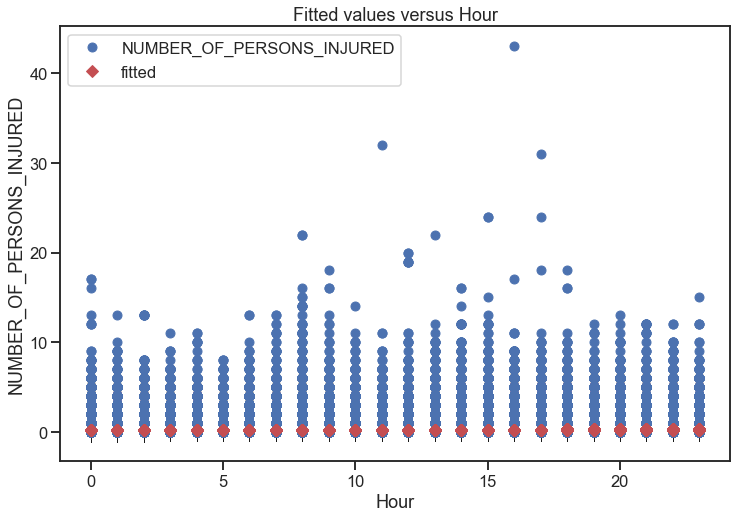

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(lm, "Hour", ax=ax)

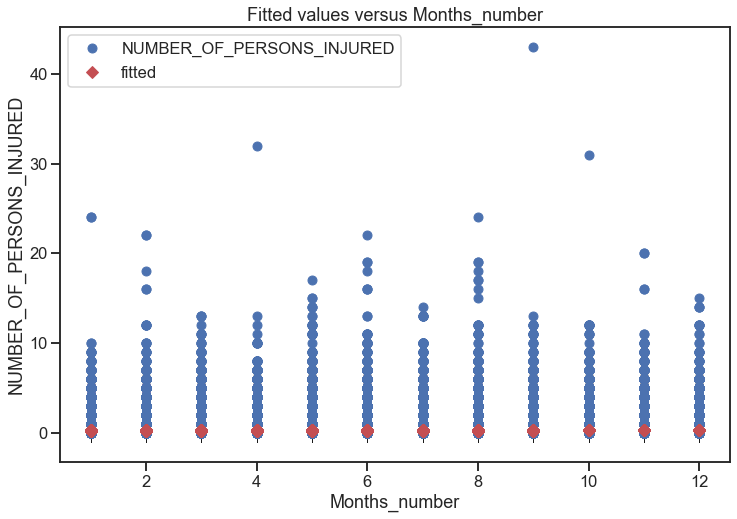

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(lm, "Months_number", ax=ax)

In [56]:
X = np.array([0,2,4,6,8,10,12,14,16,18,20,22])
X

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [57]:
j=table_hour['NUMBER_OF_PERSONS_INJURED'].values

In [58]:
Y=np.array([22020,12319,13920,22495,39349,33845,40408,51471,58053,50719,39248,31100])

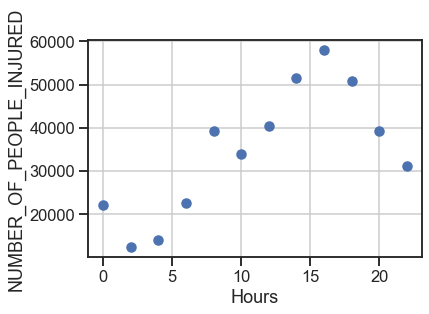

In [59]:
plt.grid(True)
plt.scatter(X,Y)
plt.title('')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")


plt.show()

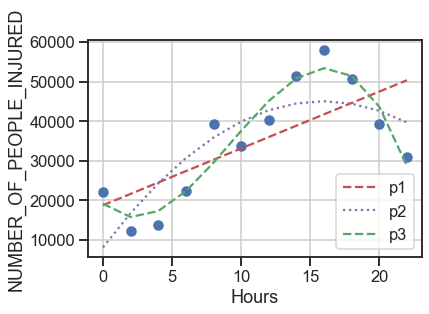

In [60]:
#with a polynomial of degree 3 , I now have a curve of best fit.
p3= np.polyfit(X,Y,3)
p1= np.polyfit(X,Y,1)
p2= np.polyfit(X,Y,2)

plt.grid(True)
plt.scatter(X,Y)
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r--', label ='p1')
plt.plot(X,np.polyval(p2,X), 'm:', label='p2')

plt.plot(X,np.polyval(p3,X), 'g--', label = 'p3')
plt.legend(loc="lower right")
plt.show()

In [61]:
np.polyfit(X,Y,3)

array([  -27.82852564,   773.07804695, -3106.004329  , 19166.50549451])

In [62]:
#Predict value at X = 14 (2 in the noon).

y_fit_12 = np.polyval(p3, 14)
print ("Y_fit Value at 2 Noon :", y_fit_12)

Y_fit Value at 2 Noon : 50844.267732267705


Our Predicted value at 2 noon is 50844 against the actual value of 51471 which is pretty close

In [63]:
x_fit=np.arange(24)

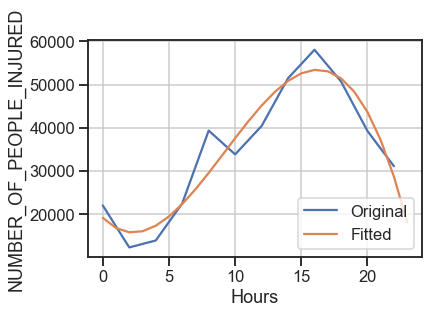

In [64]:
p3 = np.polyfit(X,Y,3)
y_fit = []
for i in range(len(x_fit)):
    y_fit.append(np.polyval(p3, i))


plt.grid(True)
plt.plot(X, Y, label = "Original")
plt.plot(x_fit, y_fit, label = "Fitted")
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")

plt.legend(loc="lower right")
plt.show()

In [65]:
table_reg['Hour'].fillna(0)

0          14
1          19
2          12
3          15
4          16
           ..
1586310     6
1586311    10
1586312     9
1586313    14
1586314    18
Name: Hour, Length: 1586315, dtype: int64

In [66]:
table_reg.dropna(inplace=True)
table_reg = table_reg.loc[~(table_reg.NUMBER_OF_PERSONS_INJURED==0)]
table_reg = table_reg.loc[~(table_reg.Hour==0)]

X=table_reg[['Hour','Months_number']]
Y=table_reg['NUMBER_OF_PERSONS_INJURED']


In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()

rfe = RFE(model, 5)
rfe.fit(X, Y)
y_pred = rfe.predict(X)

print("Support:",rfe.support_)
print("Ranking",rfe.ranking_)

Support: [ True  True]
Ranking [1 1]


### CONCLUSION AND FUTURE WORK

Based on top contributing factors that lead to collision and time and location, we can curb the same by strict patrolling and driver education.

The dataset can be futher analysed to get more meaningful insights.